In [1]:
library(dplyr)

library(clusterProfiler)
library(ktplots)
library(fgsea)
library(msigdbr)





Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE

clusterProfiler v3.14.3  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.

Loading required package: ggplot2

Loading required package: Rcpp



In [2]:
setwd('/Users/matthewcoates/Documents/Cambridge/R files/COVID scRNAseq nasal biopsy + blood/')

In [3]:
degs <- as.list(list.files('DEGs/120721/ConvalCov/', full.names= TRUE, pattern ='.csv'))

In [4]:
names(degs) <- gsub('DEGs/120721/ConvalCov/DEG_B_FO_ConCOVH.csv', '', list.files('DEGs/120721/ConvalCov/',pattern ='.csv'))
names(degs) <- substr(names(degs), start = 1, stop = nchar(names(degs))-4)
names(degs)

[1] "DEG_B_FO_ConCOVH"              "DEG_B_Naive_ConCOVH"          
 [3] "DEG_B_nonswitched_ConCOVH"     "DEG_B_switched_ConCOVH"       
 [5] "DEG_Basophil_ConCOVH"          "DEG_CD4_Act_ConCOVH"          
 [7] "DEG_CD4_Tcm_ConCOVH"           "DEG_CD4_Tem_ConCOVH"          
 [9] "DEG_CD4_Th17_ConCOVH"          "DEG_CD4_Th2_ConCOVH"          
[11] "DEG_CD4_Tn_ConCOVH"            "DEG_CD4_Trm_ConCOVH"          
[13] "DEG_CD8_CTL_ConCOVH"           "DEG_CD8_Tn_ConCOVH"           
[15] "DEG_CD8_Trm_ConCOVH"           "DEG_cDC_CD141_ConCOVH"        
[17] "DEG_cDC_CD1c_ConCOVH"          "DEG_DC_Follicular_ConCOVH"    
[19] "DEG_Endo_Stromal_ConCOVH"      "DEG_Epi_Basal_ConCOVH"        
[21] "DEG_Epi_Ciliated_ConCOVH"      "DEG_Epi_Secretory_ConCOVH"    
[23] "DEG_Epi_Squamous_ConCOVH"      "DEG_gdT_vd1_ConCOVH"          
[25] "DEG_gdT_vd2_ConCOVH"           "DEG_gdT_vd3_ConCOVH"          
[27] "DEG_ILC_ConCOVH"               "DEG_MAIT_ConCOVH"             
[29] "DEG_Mast_ConCOVH"              "DEG_Mega_ConCOVH"             
[31] "DEG_MMP_nonres_ConCOVH"        "DEG_MMP_res_ConCOVH"          
[33] "DEG_Mono_classical_ConCOVH"    "DEG_Mono_nonclassical_ConCOVH"
[35] "DEG_NK_adaptive_ConCOVH"       "DEG_NK_CD16_ConCOVH"          
[37] "DEG_NK_CD56_ConCOVH"           "DEG_pDC_ConCOVH"              
[39] "DEG_Plasma_blastIgM_ConCOVH"   "DEG_Plasma_ConCOVH"           
[41] "DEG_Tfh_ConCOVH"               "DEG_Treg_ConCOVH"

In [5]:
degs <- lapply(degs, readr::read_csv)
degs <- degs[order(names(degs))]
degs

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_ad

Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names f

X1,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HLA-DRB5,2.009053e-98,-2.267832,0.239,0.530,5.158244e-94
NR4A2,1.230945e-55,-2.119320,0.090,0.293,3.160450e-51
CXCR4,7.015632e-32,-1.261575,0.549,0.600,1.801263e-27
CD83,6.544326e-27,-1.191016,0.470,0.547,1.680256e-22
JUNB,3.277870e-23,-1.132585,0.632,0.646,8.415931e-19
SLC2A3,7.106009e-13,-1.115177,0.366,0.411,1.824468e-08
KLF6,1.100367e-12,-1.264787,0.372,0.412,2.825193e-08
BTG2,1.942011e-12,-1.080177,0.387,0.424,4.986114e-08
YPEL5,2.278227e-12,-1.255666,0.176,0.250,5.849348e-08


In [6]:
# GSEA of hallmark signatures

m_df = msigdbr(species = "Homo sapiens", category = "H")
m_df <- split(m_df, m_df$gs_name)
m_df <- lapply(m_df, function(x) x$gene_symbol)
ranklist <- lapply(degs, function(x) {
  y <- grepl('^RPS|^RPL|^MRPL|^MPRS|MT-|^HB|^IG', x$X1)
  x <- x[!y, ]
  gl <- x %>% dplyr::select(X1, avg_log2FC, p_val)
  gl$neglog10pval <- -log10(gl$p_val)
  rank <- unlist(gl$neglog10pval*sign(gl$avg_log2FC))
  rank[which(rank == -Inf)] <- -308
  rank[which(rank == Inf)] <- 308
  names(rank) <- gl$X1
  rank <- rev(sort(rank))
  return(rank)
})

In [7]:
hallmark_res <- lapply(ranklist, function(x) tryCatch(fgsea(pathways = m_df, stats = x, nperm=10000, minSize = 0, maxSize = 1000), error = function(e) {return(NULL)}))
hallmark_res <- lapply(hallmark_res, data.frame)

Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize = 0, :
“There are ties in the preranked stats (9.09% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize = 0, :
“There are ties in the preranked stats (1.88% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize = 0, :
“There are ties in the preranked stats (6.25% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize = 0, :
“There are ties in the preranked stats (1.79% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize 

In [8]:
hallmark_res

pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_APOPTOSIS,0.8375726,0.8802672,0.6363636,0.8230251,4181,1,BTG2
HALLMARK_ESTROGEN_RESPONSE_EARLY,0.3336671,0.8802672,0.9090909,1.1757502,1665,1,FOS
HALLMARK_ESTROGEN_RESPONSE_LATE,0.3336671,0.8802672,0.9090909,1.1757502,1665,1,FOS
HALLMARK_GLYCOLYSIS,0.4963066,0.8802672,-0.8181818,-1.0614917,2485,1,CXCR4
HALLMARK_HEME_METABOLISM,0.3981386,0.8802672,0.7000000,1.1897416,1539,2,"YPEL5, BTG2"
HALLMARK_HYPOXIA,0.8802672,0.8802672,-0.3972590,-0.6404745,6851,4,"CXCR4 , SLC2A3, KLF6"
HALLMARK_IL2_STAT5_SIGNALING,0.7395819,0.8802672,-0.5555556,-0.8613887,5199,3,"CD83 , SLC2A3, KLF6"
HALLMARK_INFLAMMATORY_RESPONSE,0.6052223,0.8802672,0.6000000,1.0197785,2340,2,"BTG2, KLF6"
HALLMARK_KRAS_SIGNALING_DN,0.4204316,0.8802672,-0.7242047,-1.0880193,2707,2,NR4A2


In [9]:
summary(hallmark_res)

                              Length Class      Mode
DEG_B_FO_ConCOVH              8      data.frame list
DEG_B_Naive_ConCOVH           8      data.frame list
DEG_B_nonswitched_ConCOVH     8      data.frame list
DEG_B_switched_ConCOVH        8      data.frame list
DEG_Basophil_ConCOVH          8      data.frame list
DEG_CD4_Act_ConCOVH           8      data.frame list
DEG_CD4_Tcm_ConCOVH           8      data.frame list
DEG_CD4_Tem_ConCOVH           8      data.frame list
DEG_CD4_Th17_ConCOVH          8      data.frame list
DEG_CD4_Th2_ConCOVH           0      data.frame list
DEG_CD4_Tn_ConCOVH            8      data.frame list
DEG_CD4_Trm_ConCOVH           8      data.frame list
DEG_CD8_CTL_ConCOVH           8      data.frame list
DEG_CD8_Tn_ConCOVH            8      data.frame list
DEG_CD8_Trm_ConCOVH           8      data.frame list
DEG_cDC_CD141_ConCOVH         8      data.frame list
DEG_cDC_CD1c_ConCOVH          8      data.frame list
DEG_DC_Follicular_ConCOVH     8      data.fram

In [10]:
hallmark_res[[1]]

pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_APOPTOSIS,0.8375726,0.8802672,0.6363636,0.8230251,4181,1,BTG2
HALLMARK_ESTROGEN_RESPONSE_EARLY,0.3336671,0.8802672,0.9090909,1.1757502,1665,1,FOS
HALLMARK_ESTROGEN_RESPONSE_LATE,0.3336671,0.8802672,0.9090909,1.1757502,1665,1,FOS
HALLMARK_GLYCOLYSIS,0.4963066,0.8802672,-0.8181818,-1.0614917,2485,1,CXCR4
HALLMARK_HEME_METABOLISM,0.3981386,0.8802672,0.7000000,1.1897416,1539,2,"YPEL5, BTG2"
HALLMARK_HYPOXIA,0.8802672,0.8802672,-0.3972590,-0.6404745,6851,4,"CXCR4 , SLC2A3, KLF6"
HALLMARK_IL2_STAT5_SIGNALING,0.7395819,0.8802672,-0.5555556,-0.8613887,5199,3,"CD83 , SLC2A3, KLF6"
HALLMARK_INFLAMMATORY_RESPONSE,0.6052223,0.8802672,0.6000000,1.0197785,2340,2,"BTG2, KLF6"
HALLMARK_KRAS_SIGNALING_DN,0.4204316,0.8802672,-0.7242047,-1.0880193,2707,2,NR4A2


In [11]:
plot_GSEA <- function(gsea,
                       filename,
                      h = 3, w = 5) {
  require(ggplot2)
  gsea$pathway <- gsub("HALLMARK_", "", gsea$pathway)
  gsea$pathway <- gsub("_", " ", gsea$pathway)
  gsea$pathway <- tools::toTitleCase(tolower(gsea$pathway))
  gsea$pathway <- factor(gsea$pathway, levels = unique(gsea$pathway))
  gsea$NES[which(is.na(gsea$NES))] <- 0
  gsea$pval[which(gsea$pval == 0)] <- 0.001
  gsea$pval[which(gsea$pval == 1)] <- 0.99999
  gsea$padj[which(gsea$padj == 0)] <- 0.001
  gsea$padj[which(gsea$padj == 1)] <- 0.99999
  gsea <- gsea[-which(gsea$pval >= 0.05), ]
  gsea$ranking <- -log10(gsea$pval)*sign(gsea$NES)
  gsea <- gsea[order(gsea$ranking), ]
  x_lim_min <- abs(ceiling(min(-log10(gsea$pval))))
  x_lim_max <- abs(ceiling(max(-log10(gsea$pval))))
  if(x_lim_min > x_lim_max){
    xval1 <- x_lim_min * -1
    xval2 <- x_lim_min
  } else {
    xval1 <- x_lim_max * -1
    xval2 <- x_lim_max
  }
  g <- ggplot(gsea, aes(x = ranking, y = reorder(pathway, ranking), col = padj, size = abs(NES))) +
    geom_point(alpha = 0.8) +
    scale_color_gradientn(
      colours = c(
        # rev(colorRampPalette(RColorBrewer::brewer.pal(9, 'YlGnBu'))(125)),
        viridis::viridis(125, direction = -1),
        rep("#E7E7E7", 375)), limits = c(0:1)) +
    labs(x = expression(paste("Signed", " -log" ["10"], "pval")), y = "Hallmarks") +
    scale_y_discrete(labels = gsea$pathway) +
    theme_bw() +
    geom_vline(xintercept = 0, linetype="dashed", alpha = 0.5) +
    geom_vline(xintercept = -log10(0.25), linetype="dashed", col = '#F28E2B', alpha = 0.5) +
    geom_vline(xintercept = -log10(0.25)*-1, linetype="dashed", col = '#F28E2B', alpha = 0.5) +
    theme(
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      axis.line = element_line(colour = "black")) +
    # annotate("rect", xmin=-Inf, xmax=0, ymin=0, ymax=Inf, alpha = 0.1) +
    xlim(xval1, xval2) +
    scale_radius(range = c(3,7)) +
    coord_cartesian(clip = 'off') + small_guide() + small_legend(keysize=.5) +
    ggtitle(names(ranklist)[i])
  return(g)
   ggsave(file = filename, plot = g, device = 'pdf', useDingbats = FALSE, h = h, w = w)
}



In [12]:
names(ranklist)

[1] "DEG_B_FO_ConCOVH"              "DEG_B_Naive_ConCOVH"          
 [3] "DEG_B_nonswitched_ConCOVH"     "DEG_B_switched_ConCOVH"       
 [5] "DEG_Basophil_ConCOVH"          "DEG_CD4_Act_ConCOVH"          
 [7] "DEG_CD4_Tcm_ConCOVH"           "DEG_CD4_Tem_ConCOVH"          
 [9] "DEG_CD4_Th17_ConCOVH"          "DEG_CD4_Th2_ConCOVH"          
[11] "DEG_CD4_Tn_ConCOVH"            "DEG_CD4_Trm_ConCOVH"          
[13] "DEG_CD8_CTL_ConCOVH"           "DEG_CD8_Tn_ConCOVH"           
[15] "DEG_CD8_Trm_ConCOVH"           "DEG_cDC_CD141_ConCOVH"        
[17] "DEG_cDC_CD1c_ConCOVH"          "DEG_DC_Follicular_ConCOVH"    
[19] "DEG_Endo_Stromal_ConCOVH"      "DEG_Epi_Basal_ConCOVH"        
[21] "DEG_Epi_Ciliated_ConCOVH"      "DEG_Epi_Secretory_ConCOVH"    
[23] "DEG_Epi_Squamous_ConCOVH"      "DEG_gdT_vd1_ConCOVH"          
[25] "DEG_gdT_vd2_ConCOVH"           "DEG_gdT_vd3_ConCOVH"          
[27] "DEG_ILC_ConCOVH"               "DEG_MAIT_ConCOVH"             
[29] "DEG_Mast_ConCOVH"              "DEG_Mega_ConCOVH"             
[31] "DEG_MMP_nonres_ConCOVH"        "DEG_MMP_res_ConCOVH"          
[33] "DEG_Mono_classical_ConCOVH"    "DEG_Mono_nonclassical_ConCOVH"
[35] "DEG_NK_adaptive_ConCOVH"       "DEG_NK_CD16_ConCOVH"          
[37] "DEG_NK_CD56_ConCOVH"           "DEG_pDC_ConCOVH"              
[39] "DEG_Plasma_blastIgM_ConCOVH"   "DEG_Plasma_ConCOVH"           
[41] "DEG_Tfh_ConCOVH"               "DEG_Treg_ConCOVH"

In [19]:
names(ranklist[18])

[1] "DEG_DC_Follicular_ConCOVH"

In [14]:
hallmark_res

pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_APOPTOSIS,0.8375726,0.8802672,0.6363636,0.8230251,4181,1,BTG2
HALLMARK_ESTROGEN_RESPONSE_EARLY,0.3336671,0.8802672,0.9090909,1.1757502,1665,1,FOS
HALLMARK_ESTROGEN_RESPONSE_LATE,0.3336671,0.8802672,0.9090909,1.1757502,1665,1,FOS
HALLMARK_GLYCOLYSIS,0.4963066,0.8802672,-0.8181818,-1.0614917,2485,1,CXCR4
HALLMARK_HEME_METABOLISM,0.3981386,0.8802672,0.7000000,1.1897416,1539,2,"YPEL5, BTG2"
HALLMARK_HYPOXIA,0.8802672,0.8802672,-0.3972590,-0.6404745,6851,4,"CXCR4 , SLC2A3, KLF6"
HALLMARK_IL2_STAT5_SIGNALING,0.7395819,0.8802672,-0.5555556,-0.8613887,5199,3,"CD83 , SLC2A3, KLF6"
HALLMARK_INFLAMMATORY_RESPONSE,0.6052223,0.8802672,0.6000000,1.0197785,2340,2,"BTG2, KLF6"
HALLMARK_KRAS_SIGNALING_DN,0.4204316,0.8802672,-0.7242047,-1.0880193,2707,2,NR4A2


Warning message in min(-log10(gsea$pval)):
“no non-missing arguments to min; returning Inf”
Warning message in max(-log10(gsea$pval)):
“no non-missing arguments to max; returning -Inf”
Warning message in rep(yes, length.out = len):
“'x' is NULL so the result will be NULL”


ERROR: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero


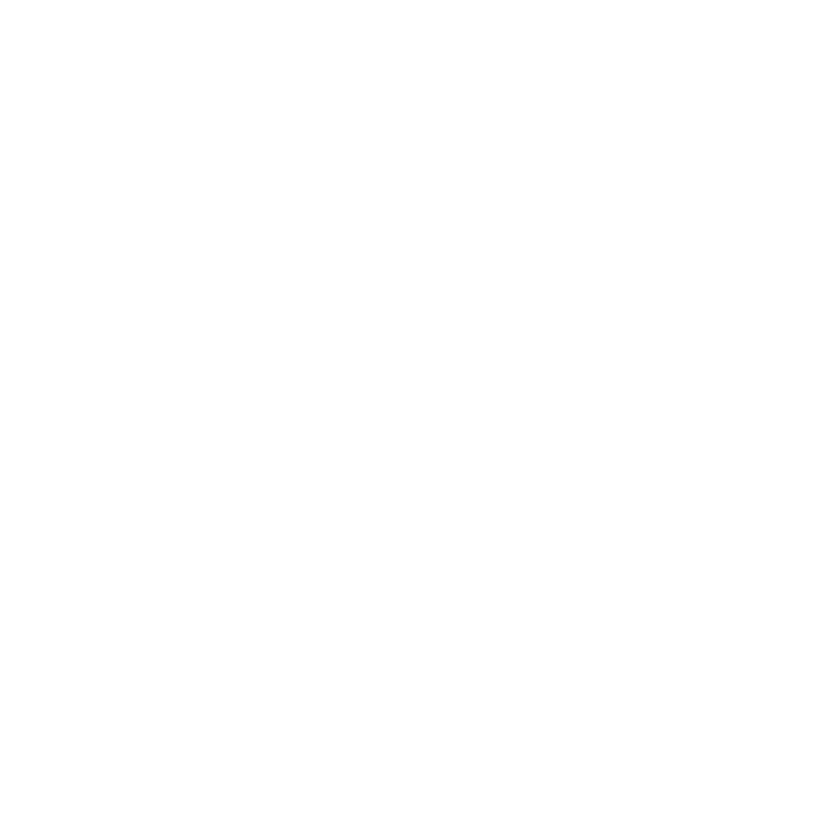

In [15]:
for (i in 1:length(ranklist)){
  plot <- tryCatch(expr = hallmark_res)
  plot <- plot_GSEA(hallmark_res[[i]])
    print(plot)
}

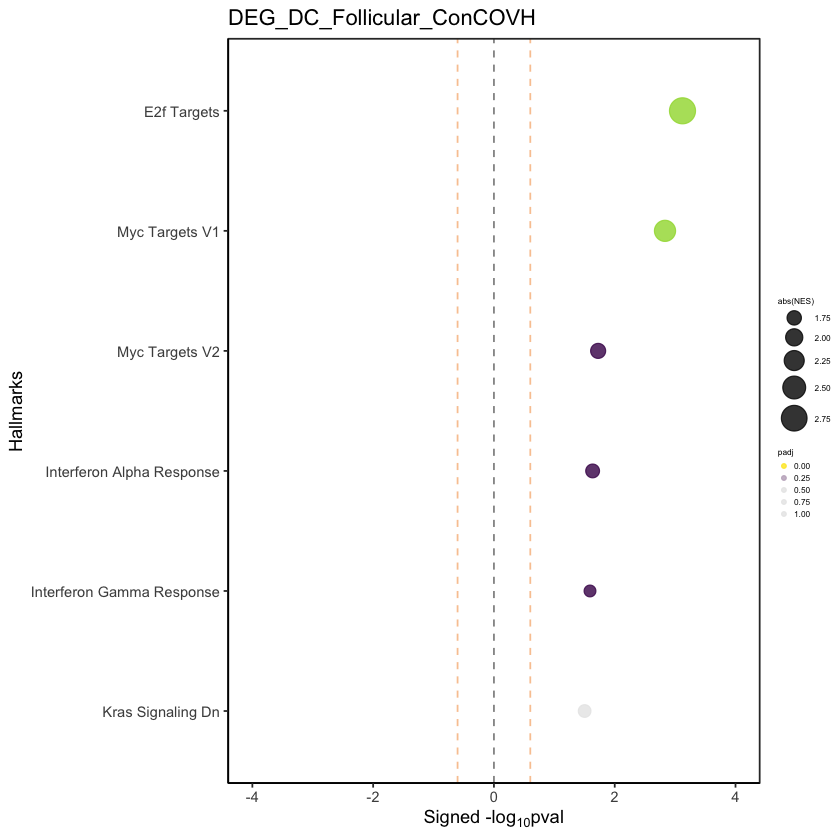

In [20]:
plot_GSEA(hallmark_res[[18]]) + ggtitle(names(ranklist[18]))

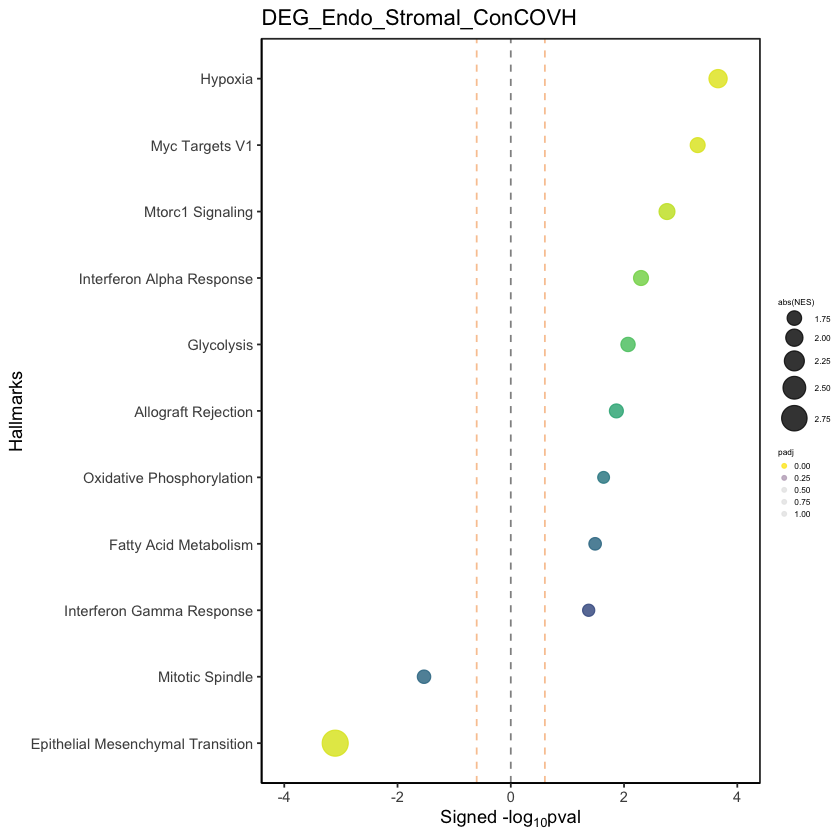

In [21]:
plot_GSEA(hallmark_res[[19]]) + ggtitle(names(ranklist[19]))

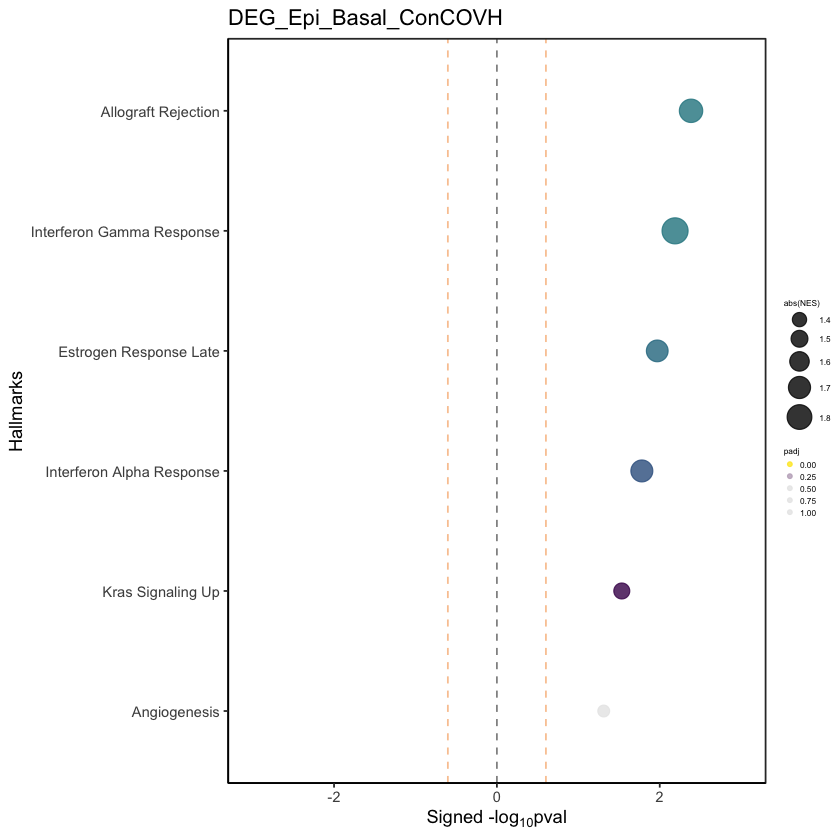

In [23]:
plot_GSEA(hallmark_res[[20]]) + ggtitle(names(ranklist[20]))

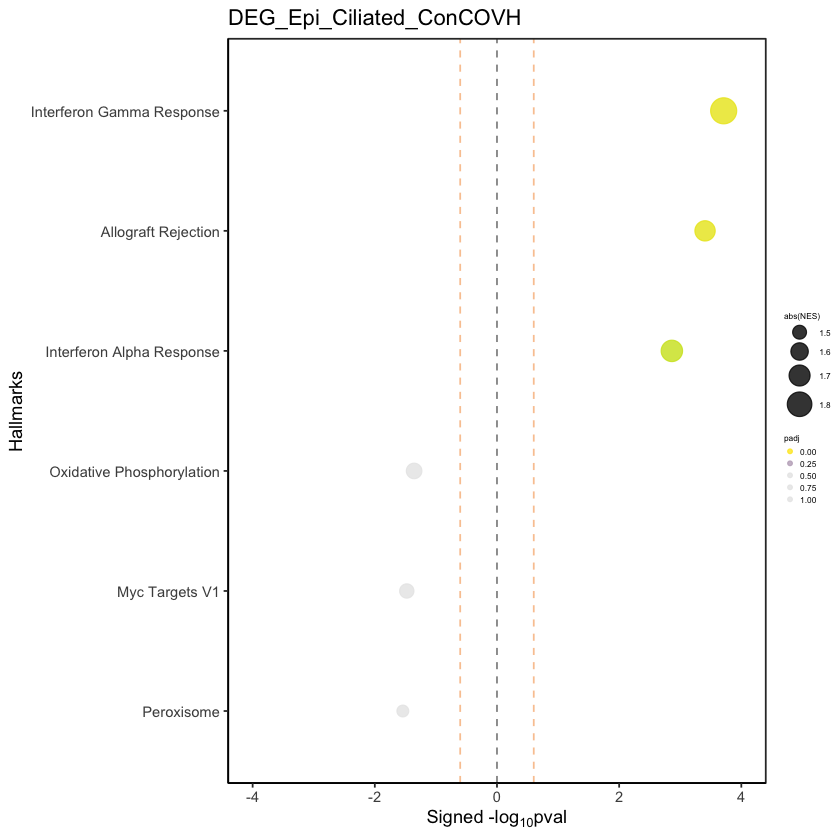

In [24]:
plot_GSEA(hallmark_res[[21]]) + ggtitle(names(ranklist[21]))

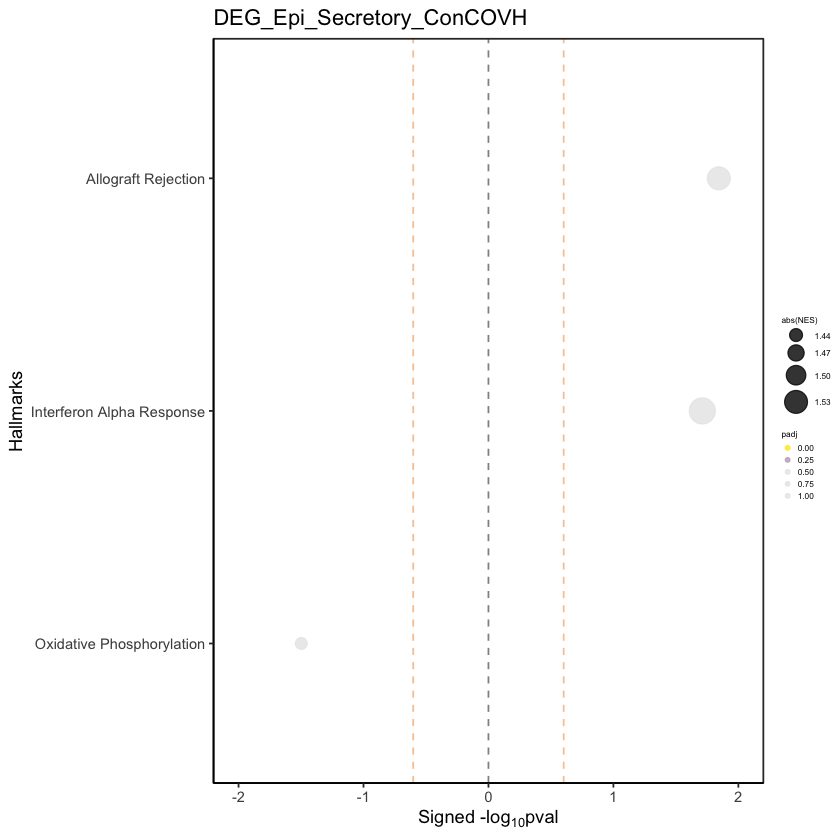

In [25]:
plot_GSEA(hallmark_res[[22]]) + ggtitle(names(ranklist[22]))

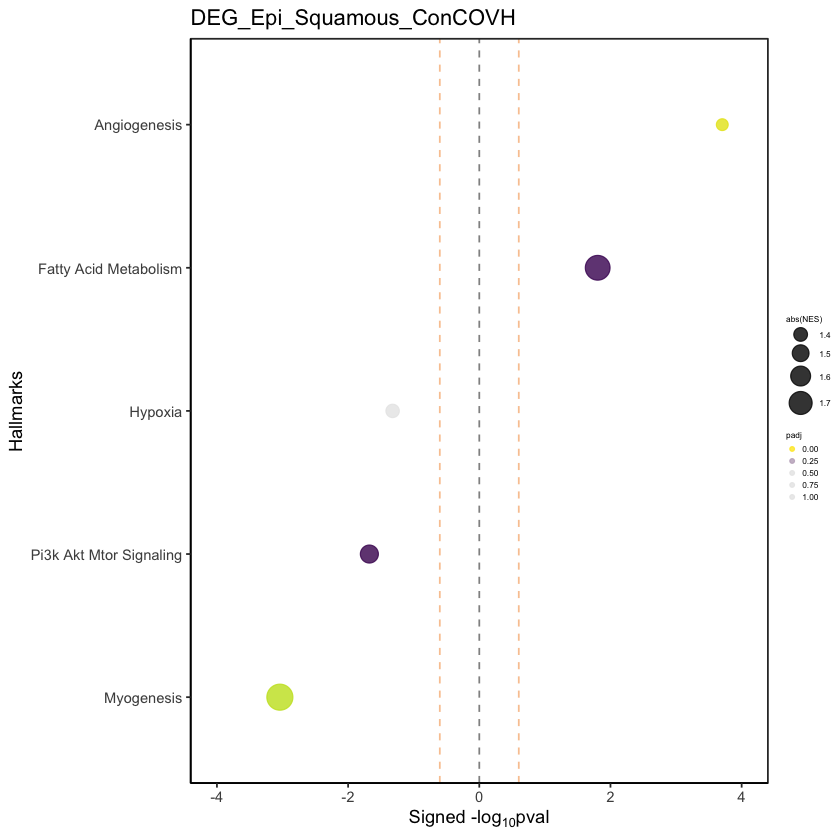

In [26]:
plot_GSEA(hallmark_res[[23]]) + ggtitle(names(ranklist[23]))

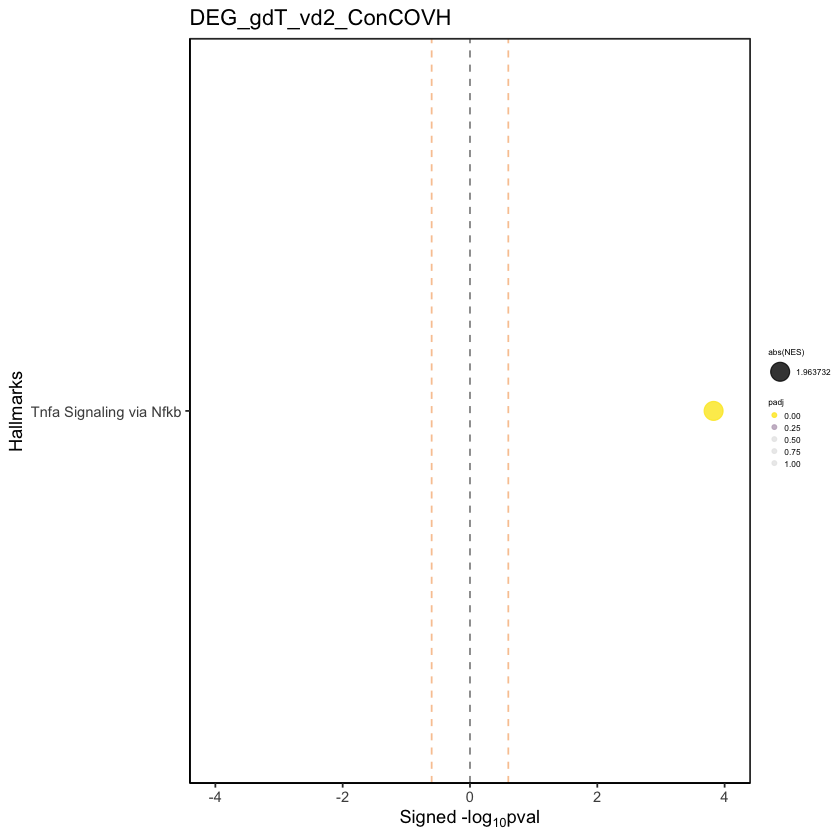

In [28]:
plot_GSEA(hallmark_res[[25]]) + ggtitle(names(ranklist[25]))

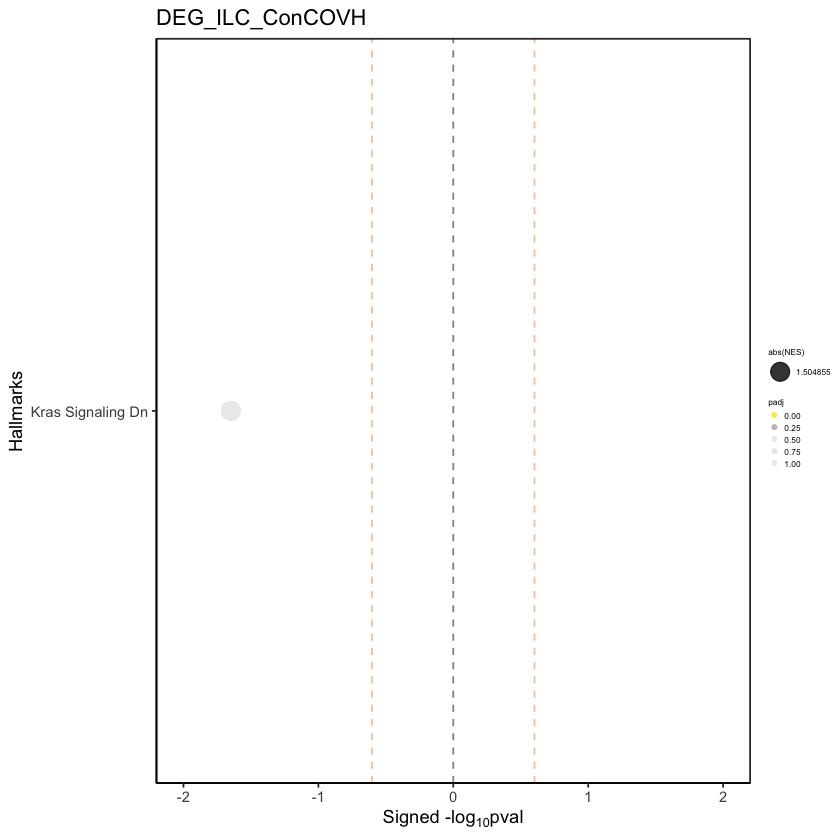

In [30]:
plot_GSEA(hallmark_res[[27]]) + ggtitle(names(ranklist[27]))

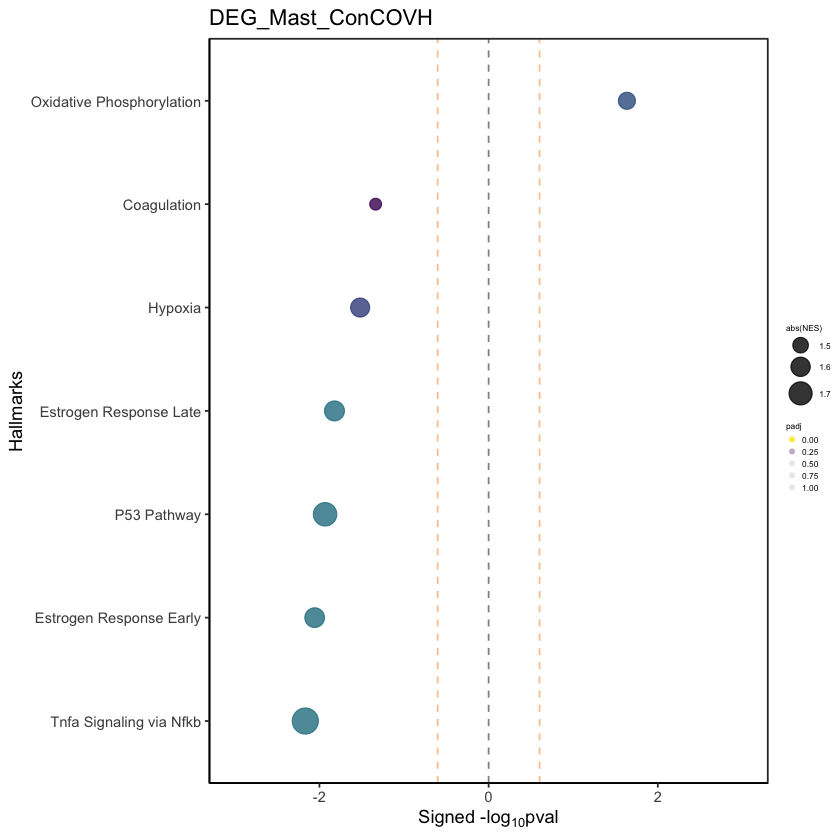

In [32]:
plot_GSEA(hallmark_res[[29]]) + ggtitle(names(ranklist[29]))

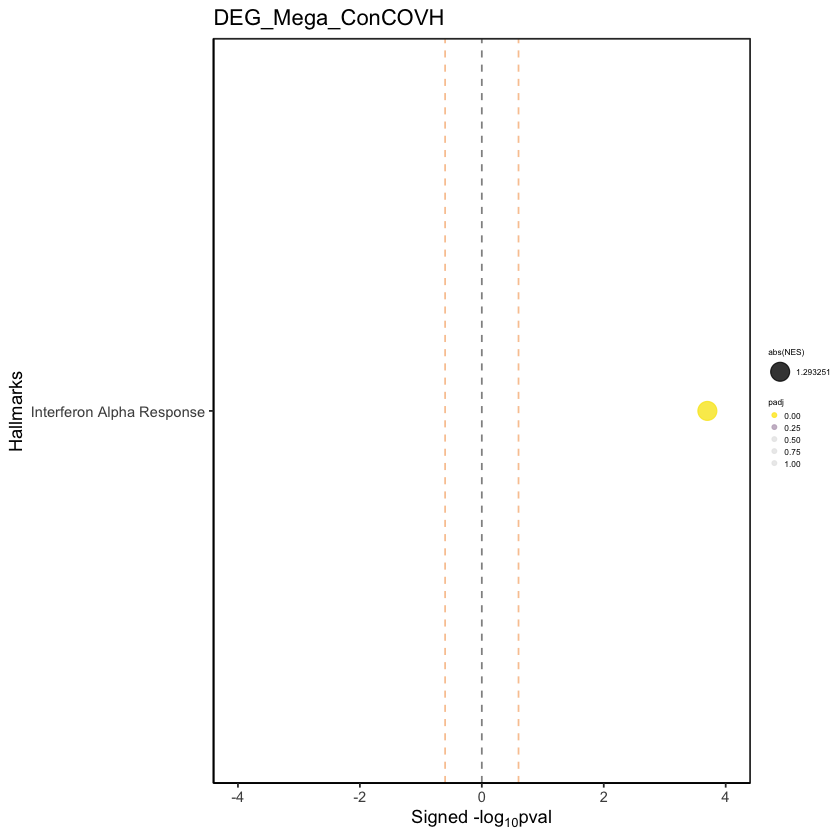

In [33]:
plot_GSEA(hallmark_res[[30]]) + ggtitle(names(ranklist[30]))

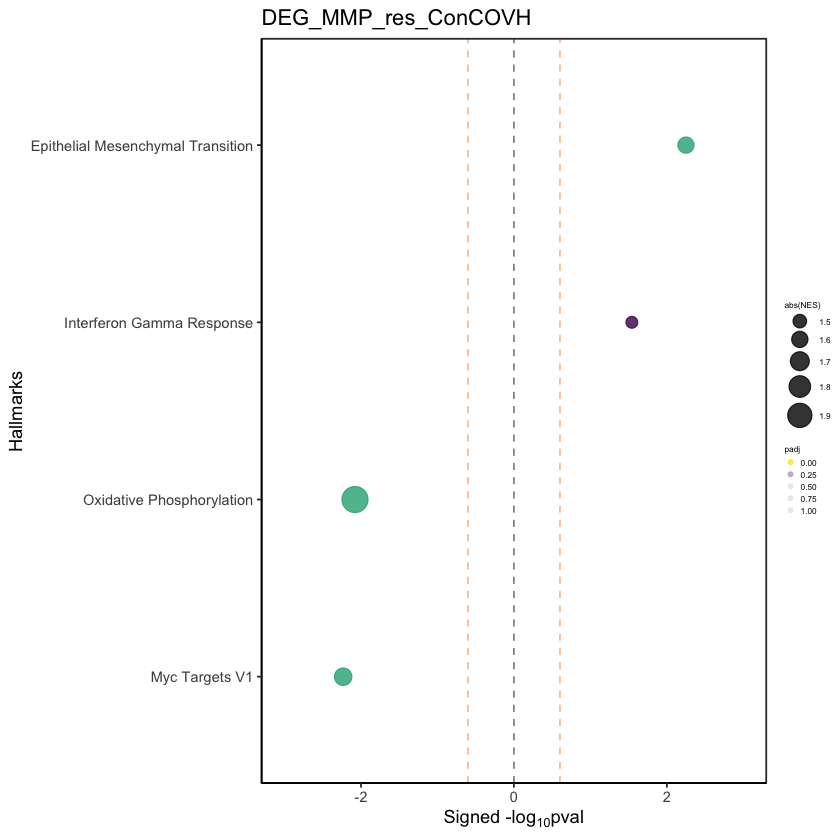

In [35]:
plot_GSEA(hallmark_res[[32]]) + ggtitle(names(ranklist[32]))

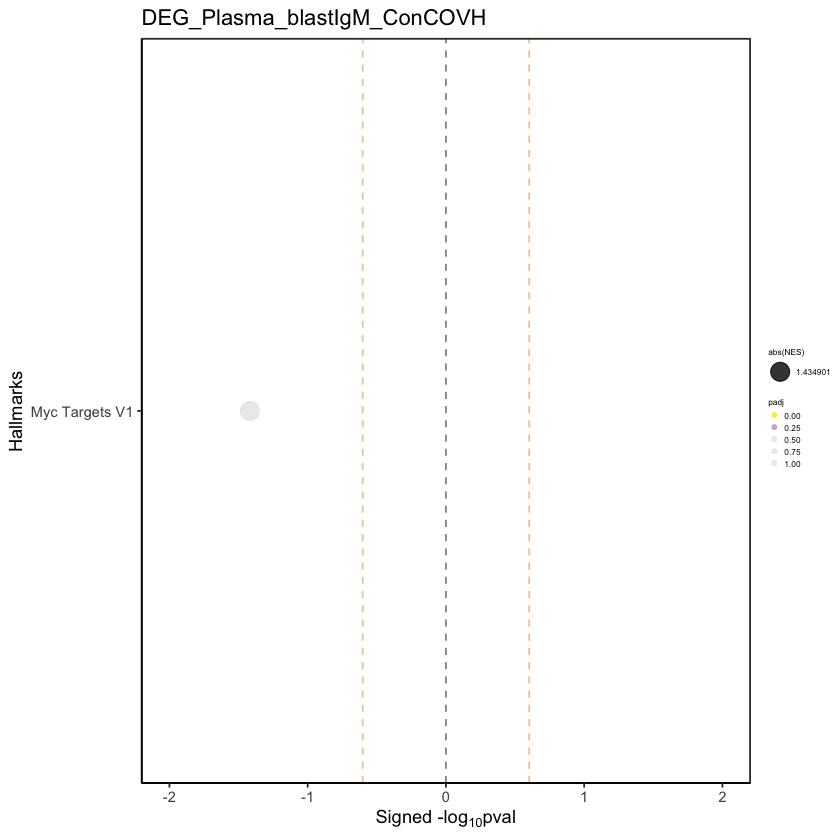

In [42]:
plot_GSEA(hallmark_res[[39]]) + ggtitle(names(ranklist[39]))

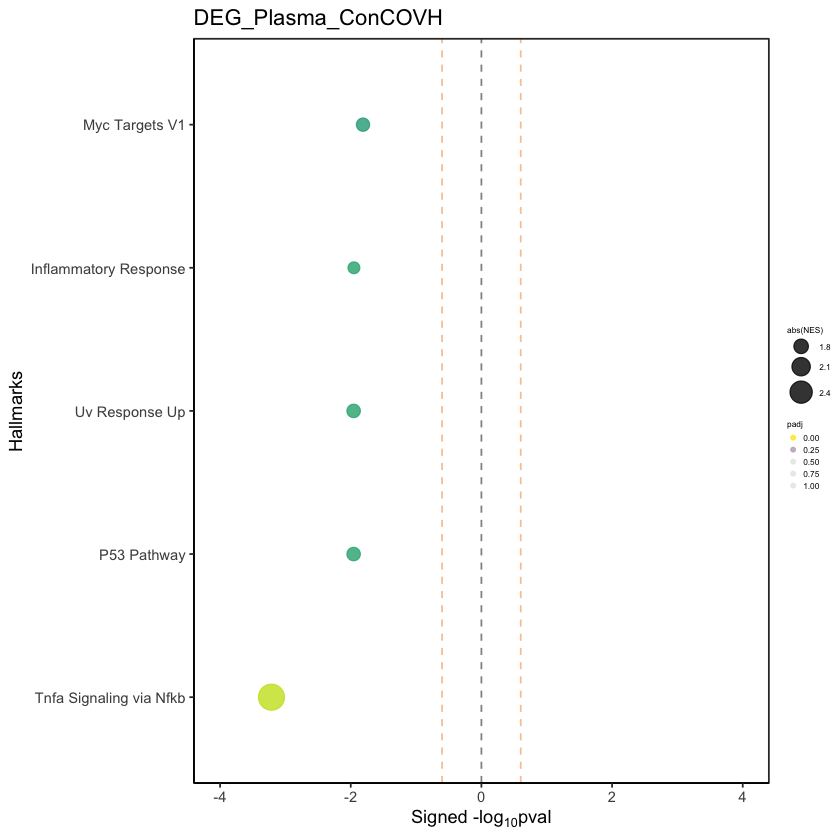

In [43]:
plot_GSEA(hallmark_res[[40]]) + ggtitle(names(ranklist[40]))

In [72]:
for (i in 1:length(ranklist)){
  hallmark_res[[i]]$label = names(ranklist)[i]
}
combined_res = do.call(rbind, hallmark_res)
row.names(combined_res) <- NULL
combined_res$leadingEdge <- do.call(c, lapply(combined_res$leadingEdge, paste, collapse = "|"))
write.csv(data.frame(combined_res), file = 'figures/dotplot/mnp_gsea_hallmark.csv')

In [73]:
?pdf